# Introduction to Stata

Based on this material:

https://dss.princeton.edu/training/StataTutorial.pdf

In [1]:
* Load example dataset

use https://dss.princeton.edu/training/students.dta

In [2]:
* describe dataset

describe


Contains data from https://dss.princeton.edu/training/students.dta
  obs:            30                          
 vars:            14                          29 Sep 2009 17:12
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              byte    %8.0g                 ID
lastname        str5    %9s                   Last�Name
firstname       str6    %9s                   First Name
city            str14   %14s                  City
state           str14   %14s                  State
gender          str6    %9s                   Gender
studentstatus   str13   %13s                  Student Status
major           str8    %9s                   Major
country         str9    %9s                   Country
age             byte    %8.0g                 Age
sat             int   

In [3]:
* summarize dataset

su


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
          id |         30        15.5    8.803408          1         30
    lastname |          0
   firstname |          0
        city |          0
       state |          0
-------------+---------------------------------------------------------
      gender |          0
studentsta~s |          0
       major |          0
     country |          0
         age |         30        25.2    6.870226         18         39
-------------+---------------------------------------------------------
         sat |         30      1848.9    275.1122       1338       2309
averagesco~e |         30    80.36667    10.11139         63         96
    heightin |         30    66.43333    4.658573         59         75
newspaperr~k |         30    4.866667    1.279368          3          7


In [4]:
* choose two variables, condition on year, add detail

su sat heightin if age > 25, d


                             SAT
-------------------------------------------------------------
      Percentiles      Smallest
 1%         1434           1434
 5%         1434           1512
10%         1512           1513       Obs                  13
25%         1577           1577       Sum of Wgt.          13

50%         1716                      Mean           1851.154
                        Largest       Std. Dev.      323.1836
75%         2221           2221
90%         2263           2248       Variance       104447.6
95%         2279           2263       Skewness        .210505
99%         2279           2279       Kurtosis       1.425826

                         Height (in)
-------------------------------------------------------------
      Percentiles      Smallest
 1%           59             59
 5%           59             59
10%           59             61       Obs                  13
25%           63             63       Sum of Wgt.          13

50%           68    

In [5]:
*tabulate categorical variables

tab major


      Major |      Freq.     Percent        Cum.
------------+-----------------------------------
       Econ |         10       33.33       33.33
       Math |         10       33.33       66.67
   Politics |         10       33.33      100.00
------------+-----------------------------------
      Total |         30      100.00


In [6]:
* crosstabs

tab major gender


           |        Gender
     Major |    Female       Male |     Total
-----------+----------------------+----------
      Econ |         3          7 |        10 
      Math |         8          2 |        10 
  Politics |         4          6 |        10 
-----------+----------------------+----------
     Total |        15         15 |        30 


In [7]:
* stats by gender

tabstat sat age, by(gender) stats(mean sd)


Summary statistics: mean, sd
  by categories of: gender (Gender)

gender |       sat       age
-------+--------------------
Female |    1871.8      23.2
       |   307.587  6.581359
-------+--------------------
  Male |      1826      27.2
       |  247.0752  6.773899
-------+--------------------
 Total |    1848.9      25.2
       |  275.1122  6.870226
----------------------------


In [9]:
* generate variables with "gen" command

gen age_squared = age^2

In [15]:
* do conditional logic with & (and), | (or), == (equal), != (not equal)

gen fem_grad = gender=="Female" & studentstatus=="Graduate" 

In [16]:
su age_squared if fem_grad


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
 age_squared |          5      1003.8    298.8021        625       1444


In [17]:
* another example

gen fem_less25 = (gender == "Female" & age < 26)

In [18]:
* how to drop variables:

drop fem_less25

In [19]:
* preserve dataset

preserve

In [20]:
* drop observations with age outliers:
drop if age < 20 | age > 29

(21 observations deleted)


In [21]:
* same thing:
keep if age > 25

(7 observations deleted)


In [22]:
* restore dataset:
restore

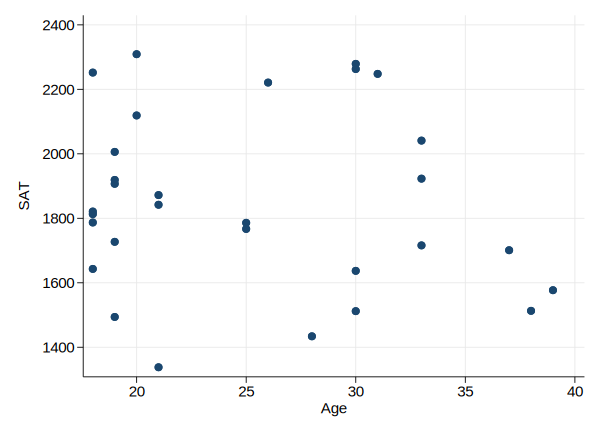

In [28]:
twoway scatter sat age

In [26]:
* use grstyle to get better-looking figures

ssc install grstyle, replace
grstyle init
grstyle set plain, horizontal grid


checking grstyle consistency and verifying not already installed...
all files already exist and are up to date.




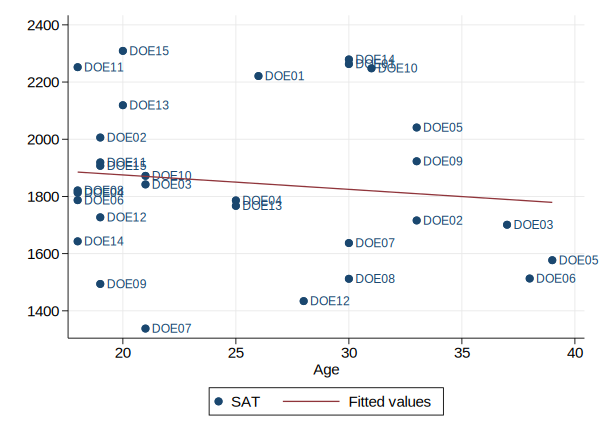

In [27]:
* add line of best fit and labels

twoway scatter sat age, mlabel(last) || lfit sat age

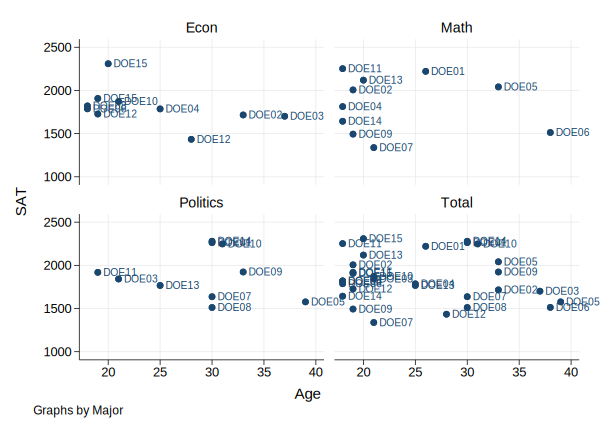

In [29]:
twoway scatter sat age, mlabel(last) by(major, total)

(bin=5, start=18, width=4.2)


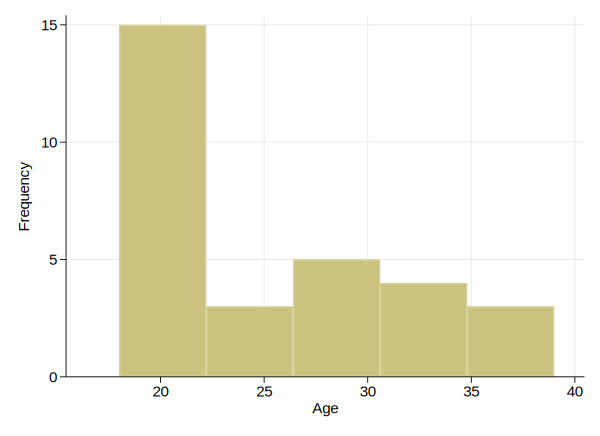

In [30]:
histogram age, frequency

(bin=5, start=18, width=4.2)


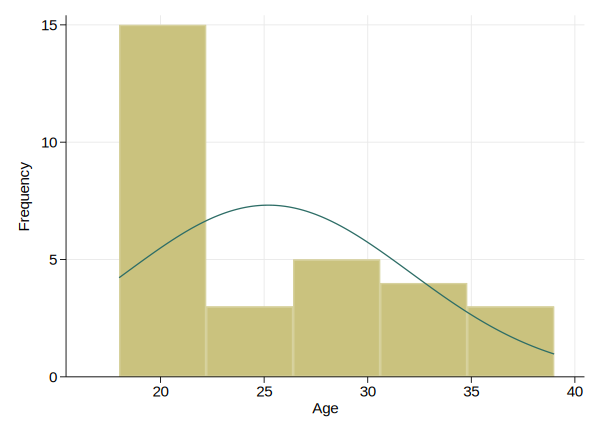

In [31]:
histogram age, frequency normal

In [33]:
* linear regression of SAT on age

reg sat age


      Source |       SS           df       MS      Number of obs   =        30
-------------+----------------------------------   F(1, 28)        =      0.45
       Model |  34846.8447         1  34846.8447   Prob > F        =    0.5070
    Residual |  2160067.86        28  77145.2805   R-squared       =    0.0159
-------------+----------------------------------   Adj R-squared   =   -0.0193
       Total |   2194914.7        29  75686.7138   Root MSE        =    277.75

------------------------------------------------------------------------------
         sat |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -5.045587   7.507316    -0.67   0.507    -20.42363    10.33245
       _cons |   1976.049   195.8628    10.09   0.000     1574.842    2377.256
------------------------------------------------------------------------------


In [36]:
* correlation matrix

pwcorr sat age heightin


             |      sat      age heightin
-------------+---------------------------
         sat |   1.0000 
         age |  -0.1260   1.0000 
    heightin |   0.0793   0.0662   1.0000 
